# E164: Introduction to Biological System Design
## Computer Setup Test Notebook

In this notebook, you will find Python code that you can run to test whether your computer has the required setup working or not. 
Follow installation instructions here: https://docs.google.com/document/d/1js7XQbjorU5LCIoWfrzkUCXjjQkVcITkT0N8osiy4Go/edit?usp=sharing


### 1. Get started with the standard numerical Python libraries: numpy and scipy:

In this notebook, we will use standard Python libraries to model growth of a virus. Numerical and scientific computation using Python is made possible by two important packages called `numpy` and `scipy`. 

There are plenty of great resources online to learn about these Python libraries. The best sources are the original documentation websites: 
1. https://numpy.org/doc/stable/ 
2. https://scipy.github.io/devdocs/index.html 

But sometimes, StackOverflow and web search might be your best friend!

#### Modeling virus growth

Let us model exponential growth of virus infection in a community. If the number of infected people is denoted by $v$, we can assume a simple model of infection growth:

$v = k e^{at}$

where $e$ is the exponential function, $t$ is time of virus spread, and $k,a > 0$ are growth parameters.

In [73]:
import numpy as np

k = 0.1
a = 0.2

# Numpy `linspace` command let's you create linearly spaced Numpy arrays
t = np.linspace(0, 40, 41)
# Numpy has many mathematical functions available as methods. 
# The exponential function is one example:
v = k*np.exp(a*t)

### Look at the numpy arrays and explore the indexing:

In [74]:
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40.])

In [75]:
t[0]

0.0

In [76]:
v

array([1.00000000e-01, 1.22140276e-01, 1.49182470e-01, 1.82211880e-01,
       2.22554093e-01, 2.71828183e-01, 3.32011692e-01, 4.05519997e-01,
       4.95303242e-01, 6.04964746e-01, 7.38905610e-01, 9.02501350e-01,
       1.10231764e+00, 1.34637380e+00, 1.64446468e+00, 2.00855369e+00,
       2.45325302e+00, 2.99641000e+00, 3.65982344e+00, 4.47011845e+00,
       5.45981500e+00, 6.66863310e+00, 8.14508687e+00, 9.94843156e+00,
       1.21510418e+01, 1.48413159e+01, 1.81272242e+01, 2.21406416e+01,
       2.70426407e+01, 3.30299560e+01, 4.03428793e+01, 4.92749041e+01,
       6.01845038e+01, 7.35095189e+01, 8.97847292e+01, 1.09663316e+02,
       1.33943076e+02, 1.63598443e+02, 1.99819590e+02, 2.44060198e+02,
       2.98095799e+02])

### 2. Plot the arrays using the matplotlib package:

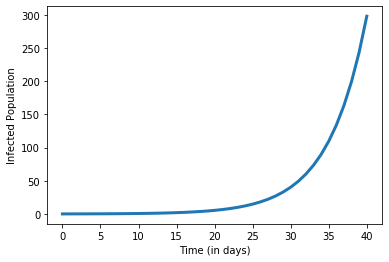

In [77]:
import matplotlib.pyplot as plt
plt.plot(t, v, linewidth = 3)
plt.xlabel('Time (in days)')
plt.ylabel('Infected Population')
plt.show();

### Using Python dictionaries

In [78]:
a_dict = {"california": 0.215, "newyork": 0.2}

In [79]:
v_ca = k*np.exp(a_dict["california"]*t)
v_ny = k*np.exp(a_dict["newyork"]*t)

### Customizing the graph using matplotlib axes

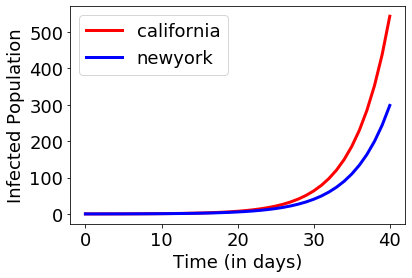

In [80]:
fig, ax = plt.subplots()
ax.plot(t, v_ca, color = 'r', lw = 3, label = list(a_dict.keys())[0])
ax.plot(t, v_ny, color = 'b', lw = 3, label = list(a_dict.keys())[1])
ax.set_xlabel('Time (in days)', fontsize = 18)
ax.set_ylabel('Infected Population', fontsize = 18)
ax.tick_params(labelsize = 18)
ax.legend(fontsize = 18);

### 3. Use SciPy for scientific computation using Python

SciPy has many scientific computation functions available. One such function is the `curve_fit` function of the `scipy.optimize` module. You can use this function to fit a function to the given data to identify the function. Let's use this function to approximate the exponential growth above. You may also try the `polyfit` or the `interpolate` functions and explore how the results differ.

### Create the artificial data arrays:

In [165]:
# Choose 5 points randomly from the arrays we have created above "t", "v_ca", and "v_ny"
# Use these 5 points as the "data" to feed into Scipy.interpolate and find the function that fits the data
chosen_days = np.random.choice(t, 5)
# Add first and last day manually to make sure we have the whole range
if t[0] not in chosen_days:
    chosen_days = np.append(chosen_days, t[0])
if t[-1] not in chosen_days:
    chosen_days = np.append(chosen_days, t[-1])
chosen_days = np.sort(chosen_days)
indices_of_chosen_days = np.searchsorted(t, chosen_days)
chosen_ca_data = v_ca[indices_of_chosen_days]
chosen_ny_data = v_ny[indices_of_chosen_days]

#### Add noise to the data:

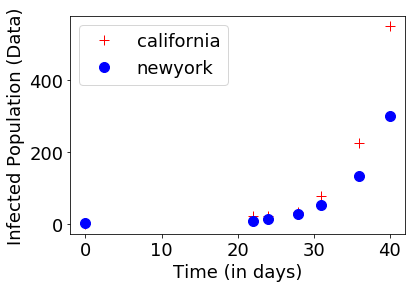

In [187]:
# Add Gaussian noise to the data
ca_data = chosen_ca_data + 5 * np.random.normal(size=chosen_ca_data.size)
ny_data = chosen_ny_data + 2 * np.random.normal(size=chosen_ny_data.size)
# Plot the data
fig, ax = plt.subplots()
ax.plot(chosen_days, ca_data, 'r+', ms = 10, label = list(a_dict.keys())[0])
ax.plot(chosen_days, ny_data, 'bo', ms = 10, label = list(a_dict.keys())[1])
ax.set_xlabel('Time (in days)', fontsize = 18)
ax.set_ylabel('Infected Population (Data)', fontsize = 18)
ax.tick_params(labelsize = 18)
ax.legend(fontsize = 18);

#### Now use scipy.optimize module:

In [173]:
from scipy.optimize import curve_fit
# v = k * e^(at)
def function_to_fit(t, k, a):
    return k*np.exp(a*t)
# Find the values for k and a
optimal_params_ca, param_covariance_ca = curve_fit(function_to_fit, chosen_days, ca_data)
optimal_params_ny, param_covariance_ny = curve_fit(function_to_fit, chosen_days, ny_data)

In [176]:
# For CA: Our original parameters were: k = 0.1 and a = 0.215
# The optimal parameters obtained for the noisy data are:
optimal_params_ca

array([0.09217858, 0.21702496])

In [177]:
# For NY: Our original parameters were: k = 0.1 and a = 0.2
# The optimal parameters obtained for the noisy data are:
optimal_params_ny

array([0.10479023, 0.19878991])

#### Now, let us plot the data along side the fitted curve

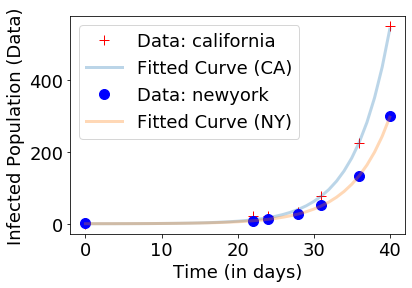

In [188]:
fig, ax = plt.subplots()
ax.plot(chosen_days, ca_data, 'r+', ms = 10, label = 'Data: '+list(a_dict.keys())[0])
ax.plot(t, function_to_fit(t, *optimal_params_ca), lw = 3, alpha = 0.3, label = 'Fitted Curve (CA)')
ax.plot(chosen_days, ny_data, 'bo', ms = 10, label = 'Data: '+list(a_dict.keys())[1])
ax.plot(t, function_to_fit(t, *optimal_params_ny), lw = 3, alpha = 0.3, label = 'Fitted Curve (NY)')
ax.set_xlabel('Time (in days)', fontsize = 18)
ax.set_ylabel('Infected Population (Data)', fontsize = 18)
ax.tick_params(labelsize = 18)
ax.legend(fontsize = 18);